In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import spacy
import nltk
#nlp = spacy.load('en')
from nltk.corpus import stopwords
stopWords = list(set(stopwords.words('english')))
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [20]:
fake = pd.read_csv('og_data/politifact_fake_statements.csv')
real = pd.read_csv('og_data/real_news_headlines.csv')
real_con = pd.read_csv('og_data/real_news.csv')
fake_hl = pd.read_csv('og_data/Fake_only_statement.csv',index_col = 0)
fake_con = pd.read_csv('og_data/Fake_only_body.csv')

In [21]:
def date_format(data):
#for idx,row in fake.iterrows():
    date = data.split(',')
    month = date[0].split()[0][:3].lower()
    day = date[0].split()[1][:-2]
    year = date[1][1:]
    #print('{} {}, {}'.format(month,day,year))
    final_string = month + ' ' + day + ', ' + year
    final_date = datetime.strptime(final_string, '%b %d, %Y').strftime('%Y-%m-%d')
    return final_date
fake['date'] = fake['date'].apply(date_format)

In [22]:
col = ['date','statement','label']
real = real[col]

In [23]:
def date_format2(data):
#for idx,row in fake.iterrows():
    final_string = data.lower()
    final_date = datetime.strptime(final_string, '%b %d, %Y').strftime('%Y-%m-%d')
    return final_date
fake_hl['date'] = fake_hl['date'].apply(date_format2)

In [24]:
fake_news = pd.concat([fake,fake_hl.iloc[::10,:]],ignore_index=True)

In [25]:
news_hl = pd.concat([real,fake_news],ignore_index=True)

In [26]:
news_hl = news_hl.sort_values('date').reset_index(drop=True)

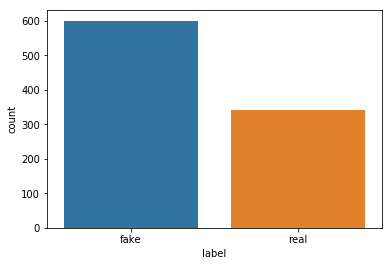

In [27]:
sns.countplot(news_hl['label'])

In [37]:
sup_adj_count_fake = 0
sup_adj_count_real = 0
sup_advb_count_real = 0
sup_advb_count_fake = 0

temp = []
for idx,rows in news_hl.iterrows():
    tokens = nltk.word_tokenize(rows['statement'])
    #temp.append(nltk.pos_tag(tokens))
    temp2 = nltk.pos_tag(tokens)
    if rows['label'] == 'fake':
        for tag in temp2:
            if tag[1] == 'JJS':
                print(tag[0])
                sup_adj_count_fake = sup_adj_count_fake + 1
            if tag[1] == 'RBS':
                print(tag[0])
                sup_advb_count_fake = sup_advb_count_fake + 1
    else:
        for tag in temp2:
            if tag[1] == 'JJS':
                print(tag[0])
                sup_adj_count_real = sup_adj_count_real + 1
            if tag[1] == 'RBS':
                print(tag[0])
                sup_advb_count_real = sup_advb_count_real + 1

greatest
most
least
Youngest
best
largest
most
best
guest
Best
Best
best
least
dishonest
dumbest
Most
Most
Most
Most
Most
Most


8

In [13]:
def rem(stat):
    if stat.split()[0].lower() == 'says' or stat.split()[0].lower() == 'quotes':
        new_stat = stat.split()[1:]
        return ' '.join(new_stat)
    else:
        return stat


news_hl['statement'] = news_hl['statement'].apply(rem)

In [ ]:
def lem(stat):
    temp = stat.lower().split()
    word_list = []
    for word in temp:
        new_word = ''
        for letter in word:
            if letter not in string.punctuation:
                new_word = new_word + letter
        if new_word not in stopWords:
            text = nlp(new_word)
            if len(text) > 0:
                if text[0].lemma_ != '-PRON-':
                    word_list.append(text[0].lemma_)
        
    statement = ' '.join(word_list)
    return statement

news_hl['statement'] = news_hl['statement'].apply(lem)

In [ ]:
t = list(news_hl['statement'].values)
text = ' '.join(t)
wordcloud = WordCloud(
    width = 1600,
    height = 1200,
    background_color = 'black').generate(text)
fig = plt.figure(
    figsize = (16, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() 
news_mat = tfidf_vect.fit_transform(news_hl['statement'])
print("size of tfidf matrix:", news_mat.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_corpus = news_hl[news_hl['label'] == 'fake']['statement']
X = vectorizer.fit_transform(data_corpus) 
#print(X.toarray())
#print(vectorizer.get_feature_names())

fake_bow_df = pd.DataFrame(data=X.toarray(),columns =vectorizer.get_feature_names())

In [ ]:
fake_bow_df.sum().nlargest(100).index

In [1]:
import sys
sys.executable

'c:\\program files (x86)\\python37-32\\python.exe'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))